# 📊 Analyse Exploratoire des Services de Développement Web - ComeUp

## 🔍 Vue d'ensemble du projet

Cette analyse explore un dataset de **1 647 services de développement web** proposés sur la plateforme ComeUp. L'objectif est de comprendre les tendances du marché, les technologies populaires, et les stratégies de prix dans l'écosystème du développement web freelance francophone.

## 📁 Dataset analysé

- **Source** : `comeup-cleaned.csv`
- **Taille** : 1 647 services
- **Variables clés** :
    - 💰 Prix, ratings, nombre d'évaluations
    - 🏷️ Catégories de services (11 catégories)
    - ⚙️ Technologies utilisées (35+ technologies identifiées)
    - 👥 Informations sur les vendeurs

## 📈 Analyses réalisées

### 1. **💵 Analyse des prix**
- Distribution des prix par catégorie
- Prix moyens vs médians
- Corrélations prix-qualité

### 2. **🛠️ Technologies dominantes**
- **WordPress** : Technologie leader (836 occurrences)
- Analyse mono vs multi-technologies
- Tendances d'adoption technologique

### 3. **📂 Segmentation par catégories**
- 11 catégories de services identifiées
- **Website Development** : Segment dominant (950 services)
- Analyse comparative des performances

### 4. **⭐ Qualité et réputation**
- Relation rating/prix
- Impact du nombre d'évaluations
- Top vendors par volume et prix

## 🎯 Insights principaux

- **79,5%** des services utilisent une seule technologie 🔧
- Prix moyen global : **165,42£** 💰
- WordPress domine avec **50,8%** de part de marché 🌟
- Les services multi-technologies ne sont pas nécessairement plus chers 📊

## 🔬 Méthodologie

- 📊 Visualisations avec `matplotlib` et `seaborn`
- 📋 Analyse statistique descriptive
- 🔗 Matrices de corrélation
- 📈 Dashboards multi-métriques

## 💡 Conclusion

Cette analyse fournit une vision complète du marché du développement web freelance et peut servir de base pour des décisions stratégiques dans ce secteur. Les données révèlent un écosystème diversifié où WordPress reste roi, mais où de nouvelles technologies émergent progressivement.

---

*📅 Analyse réalisée avec Python - Jupyter Notebook*  
*🔧 Technologies : pandas, matplotlib, seaborn, numpy*

In [4]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from ast import literal_eval
import warnings

warnings.filterwarnings('ignore')

In [5]:
# Configuration pour de beaux graphiques
plt.style.use('default')
sns.set_palette("husl")

# Chargement des données
data_processed_dir = "../../../data/raw/"
site_vitrine_processed_dir = data_processed_dir + 'site-vitrine/'
df = pd.read_csv(site_vitrine_processed_dir + 'comeup-cleaned.csv')

# Conversion de la colonne Techno_List (string vers liste)
df['Techno_List'] = df['Techno_List'].apply(literal_eval)

print(f"Dataset chargé: {df.shape}")
df.head()

Dataset chargé: (1647, 10)


,Vendor_Name,Service_Description,Price,Rating,Number_of_Ratings,Category,Techno_List,Techno_Main,Techno_Count,Is_Multi_Tech
0,Jerome_webdesign,Je vais créer votre site sous Wordpress,140.0,5.0,171,Website Development,[WordPress],WordPress,1,False
1,UpWeb_Agency,"Je vais créer votre site web, vitrine WordPres...",390.0,5.0,142,SEO Optimization,"[WordPress, Divi]",Multiple,2,True
2,Caroline_WordPress,Je vais créer votre site web WordPress personn...,395.0,5.0,385,SEO Optimization,"[WordPress, Divi, Elementor]",Multiple,3,True
3,Netcoaching,Je vais créer ou faire la refonte Premium de v...,50.0,5.0,10,Website Redesign,"[Divi, Elementor]",Multiple,2,True
4,Monark_Studio,Je vais créer votre site de conciergerie Airbn...,490.0,0.0,0,Booking/Reservation,[Unprecised],Unprecised,1,False


<Figure size 1200x600 with 0 Axes>

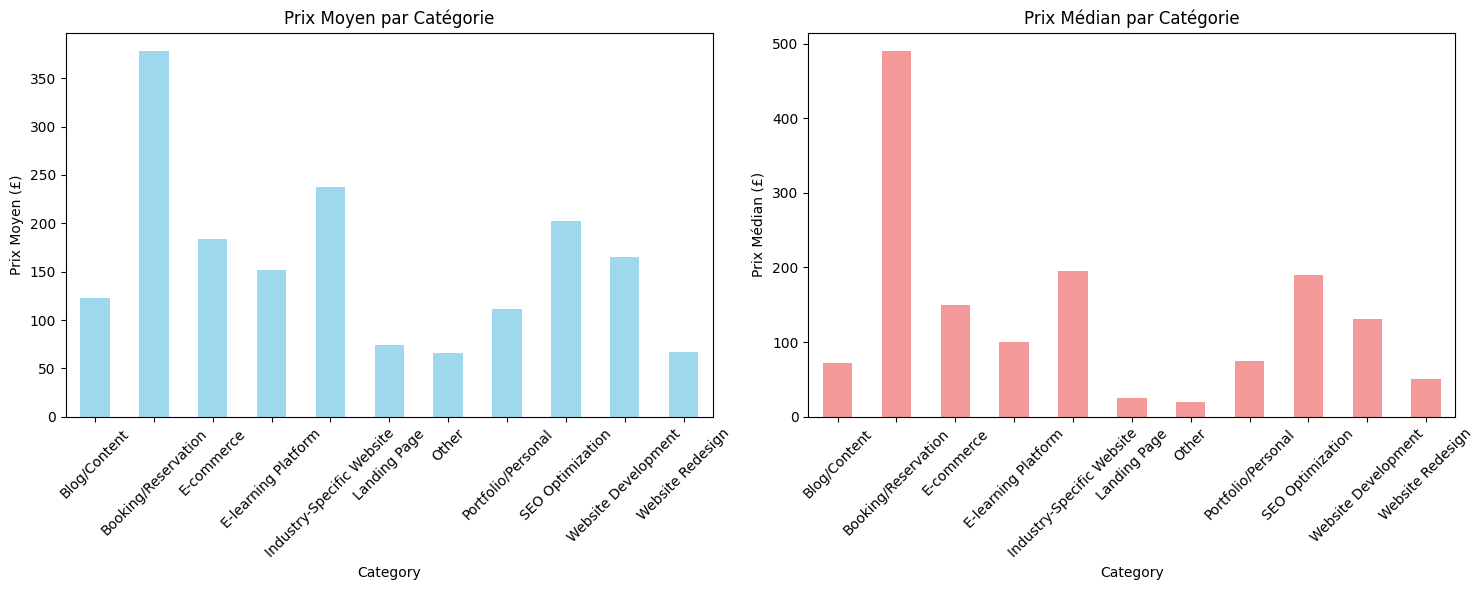

Statistiques par catégorie:
                                 mean   median  count
Category                                             
Blog/Content               122.310500   72.500     40
Booking/Reservation        378.113208  490.000     53
E-commerce                 183.677966  150.000     59
E-learning Platform        152.188857  100.000     35
Industry-Specific Website  237.343750  195.000     32
Landing Page                74.665636   25.000     55
Other                       66.050847   20.000     59
Portfolio/Personal         111.690541   75.000     37
SEO Optimization           202.250377  190.000    265
Website Development        165.422042  130.805    950
Website Redesign            66.451613   50.000     62


In [6]:
# Graphique en barres des prix moyens par catégorie
plt.figure(figsize=(12, 6))
category_avg_price = df.groupby('Category')['Price'].agg(['mean', 'median', 'count'])

# Subplot avec prix moyen et médian
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Prix moyen
category_avg_price['mean'].plot(kind='bar', ax=ax1, color='skyblue', alpha=0.8)
ax1.set_title('Prix Moyen par Catégorie')
ax1.set_ylabel('Prix Moyen (£)')
ax1.tick_params(axis='x', rotation=45)

# Prix médian
category_avg_price['median'].plot(kind='bar', ax=ax2, color='lightcoral', alpha=0.8)
ax2.set_title('Prix Médian par Catégorie')
ax2.set_ylabel('Prix Médian (£)')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Statistiques
print("Statistiques par catégorie:")
print(category_avg_price)

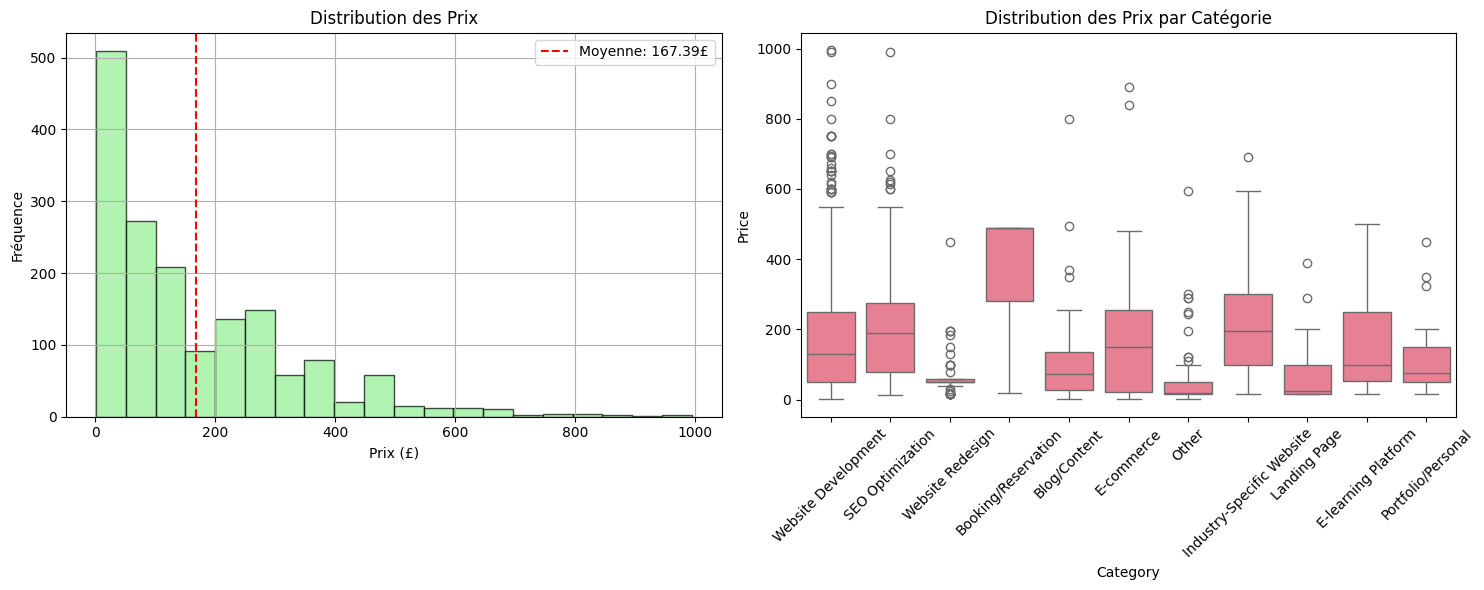

In [7]:
# Distribution des prix
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Histogramme
df['Price'].hist(bins=20, ax=ax1, color='lightgreen', alpha=0.7, edgecolor='black')
ax1.set_title('Distribution des Prix')
ax1.set_xlabel('Prix (£)')
ax1.set_ylabel('Fréquence')
ax1.axvline(df['Price'].mean(), color='red', linestyle='--', label=f'Moyenne: {df["Price"].mean():.2f}£')
ax1.legend()

# Boxplot par catégorie
sns.boxplot(data=df, x='Category', y='Price', ax=ax2)
ax2.set_title('Distribution des Prix par Catégorie')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

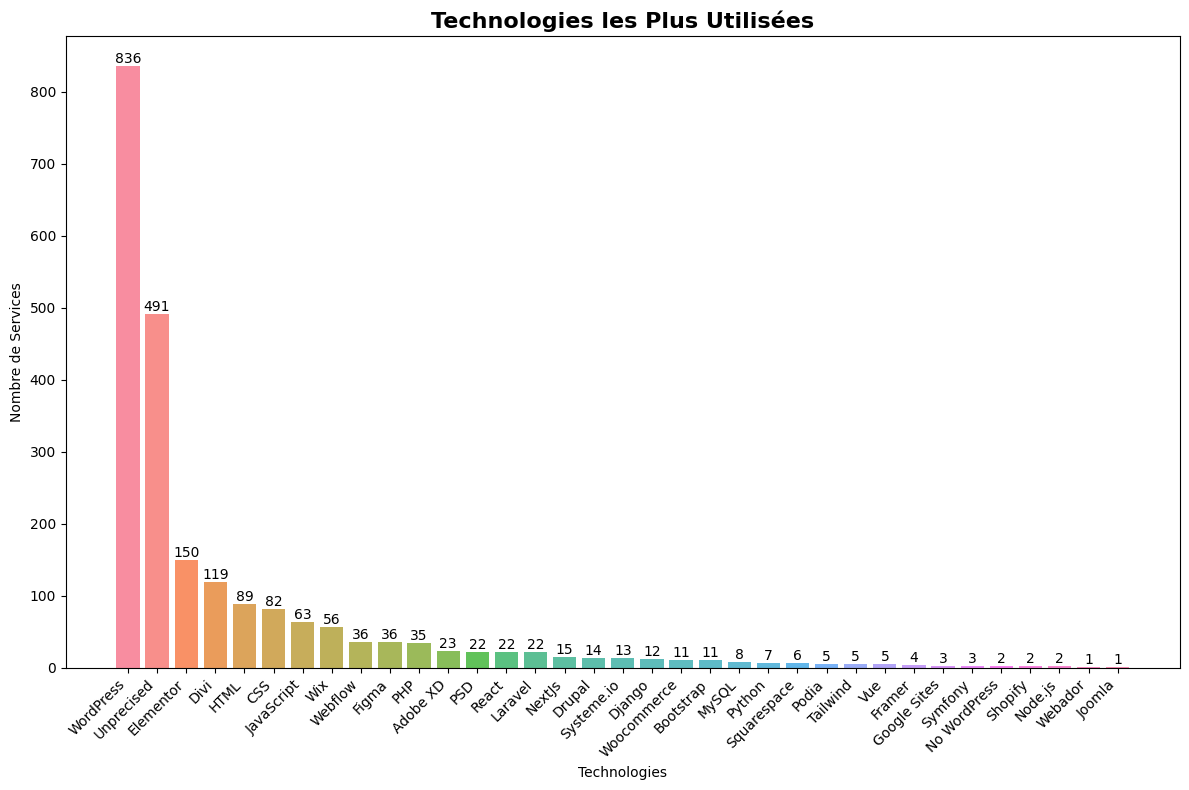

Top 10 des technologies:
WordPress: 836
Unprecised: 491
Elementor: 150
Divi: 119
HTML: 89
CSS: 82
JavaScript: 63
Wix: 56
Webflow: 36
Figma: 36


In [8]:
# Comptage des technologies
from collections import Counter
all_technologies = [tech for tech_list in df['Techno_List'] for tech in tech_list]
tech_counts = Counter(all_technologies)

# Graphique des technologies les plus utilisées
plt.figure(figsize=(12, 8))
tech_df = pd.DataFrame(tech_counts.most_common(), columns=['Technology', 'Count'])

# Inclure "Unprecised"
# tech_df = tech_df[tech_df['Technology'] != 'Unprecised']  # Exclure "Unprecised"

colors = sns.color_palette("husl", len(tech_df))
bars = plt.bar(tech_df['Technology'], tech_df['Count'], color=colors, alpha=0.8)
plt.title('Technologies les Plus Utilisées', fontsize=16, fontweight='bold')
plt.xlabel('Technologies')
plt.ylabel('Nombre de Services')
plt.xticks(rotation=45, ha='right')

# Ajouter les valeurs sur les barres
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.1,
             f'{int(height)}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

print("Top 10 des technologies:")
for tech, count in tech_counts.most_common(10):
    print(f"{tech}: {count}")

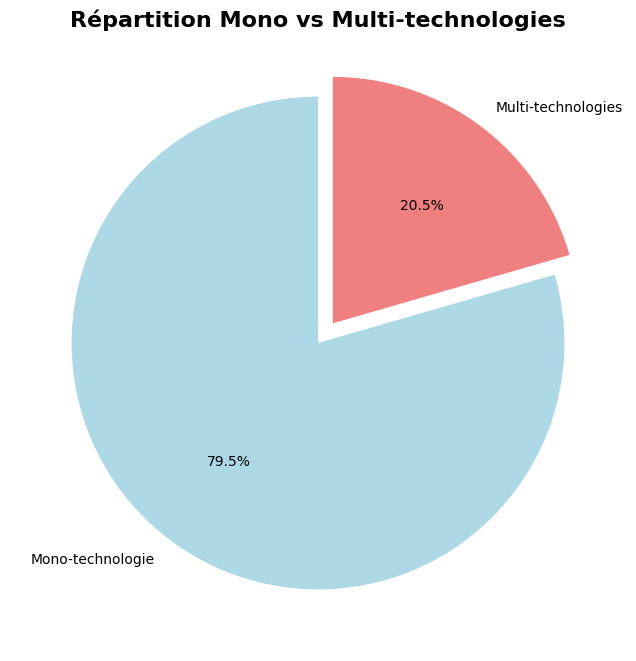

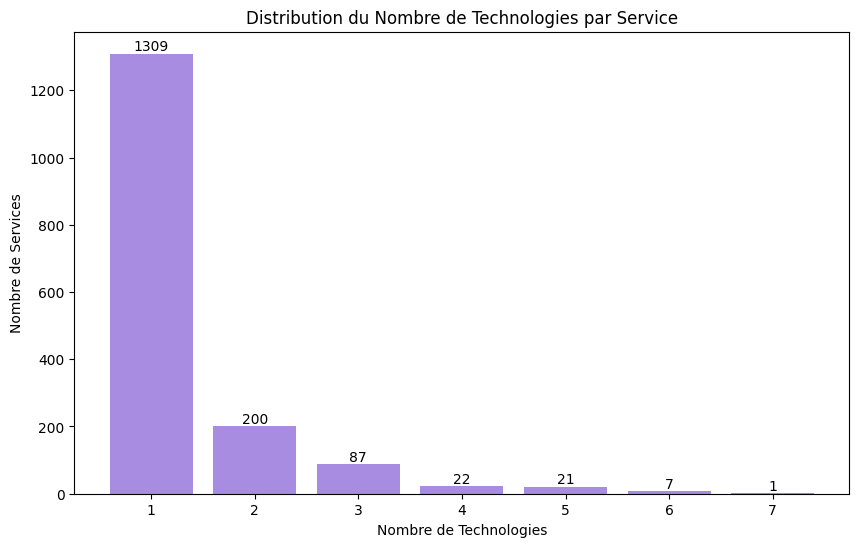

In [9]:
# Pie chart des services mono vs multi-tech
tech_distribution = df['Is_Multi_Tech'].value_counts()
labels = ['Mono-technologie', 'Multi-technologies']
colors = ['lightblue', 'lightcoral']

plt.figure(figsize=(10, 8))
plt.pie(tech_distribution.values, labels=labels, colors=colors, autopct='%1.1f%%', 
        startangle=90, explode=(0, 0.1))
plt.title('Répartition Mono vs Multi-technologies', fontsize=16, fontweight='bold')

# Graphique en barres du nombre de technologies par service
plt.figure(figsize=(10, 6))
tech_count_dist = df['Techno_Count'].value_counts().sort_index()
bars = plt.bar(tech_count_dist.index, tech_count_dist.values, color='mediumpurple', alpha=0.8)
plt.title('Distribution du Nombre de Technologies par Service')
plt.xlabel('Nombre de Technologies')
plt.ylabel('Nombre de Services')

# Ajouter les valeurs
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.1,
             f'{int(height)}', ha='center', va='bottom')

plt.show()

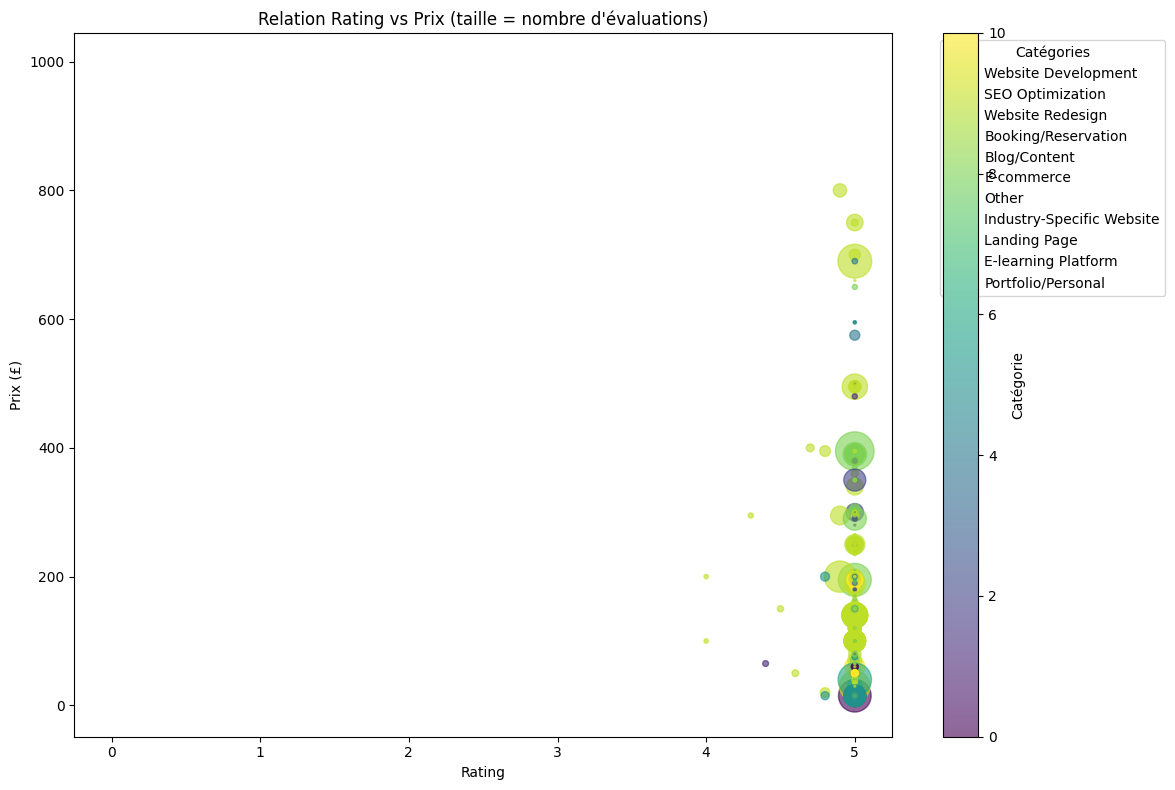

In [10]:
# Scatter plot avec taille proportionnelle au nombre d'évaluations
plt.figure(figsize=(12, 8))
scatter = plt.scatter(df['Rating'], df['Price'], 
                     s=df['Number_of_Ratings']*2,  # Taille proportionnelle
                     c=df['Category'].astype('category').cat.codes, 
                     alpha=0.6, cmap='viridis')

plt.xlabel('Rating')
plt.ylabel('Prix (£)')
plt.title('Relation Rating vs Prix (taille = nombre d\'évaluations)')
plt.colorbar(scatter, label='Catégorie')

# Légende pour les catégories
categories = df['Category'].unique()
for i, cat in enumerate(categories):
    plt.scatter([], [], c=plt.cm.viridis(i/len(categories)), label=cat)
plt.legend(title='Catégories', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

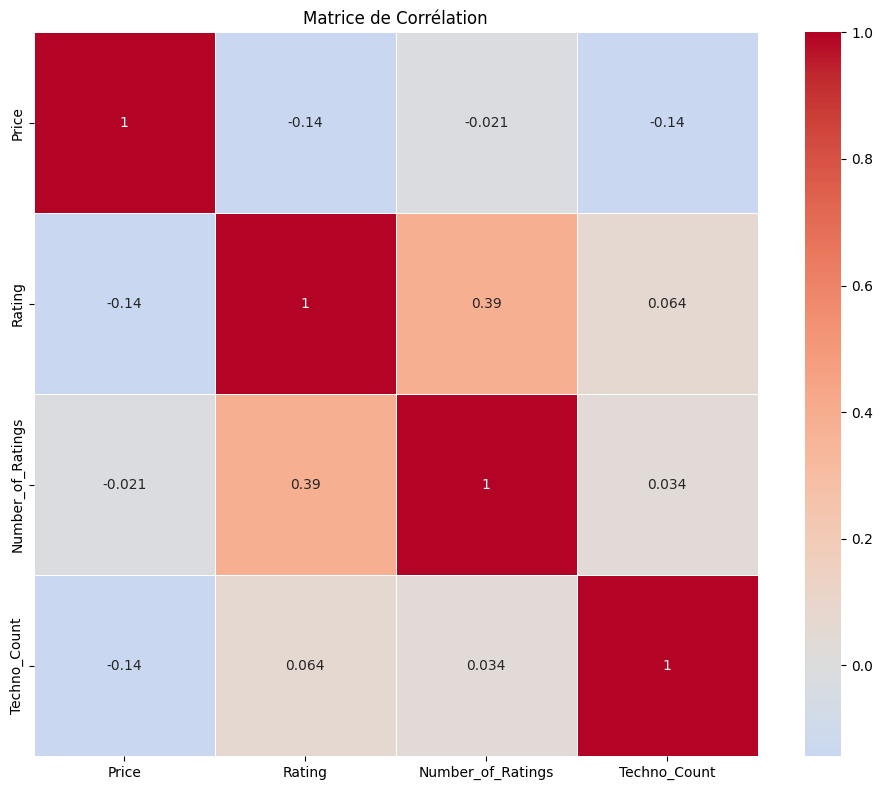

Corrélations intéressantes:
                      Price    Rating  Number_of_Ratings  Techno_Count
Price              1.000000 -0.140719          -0.021060     -0.143200
Rating            -0.140719  1.000000           0.391228      0.063738
Number_of_Ratings -0.021060  0.391228           1.000000      0.033584
Techno_Count      -0.143200  0.063738           0.033584      1.000000


In [11]:
# Matrice de corrélation
numeric_cols = ['Price', 'Rating', 'Number_of_Ratings', 'Techno_Count']
correlation_matrix = df[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5)
plt.title('Matrice de Corrélation')
plt.tight_layout()
plt.show()

print("Corrélations intéressantes:")
print(correlation_matrix)

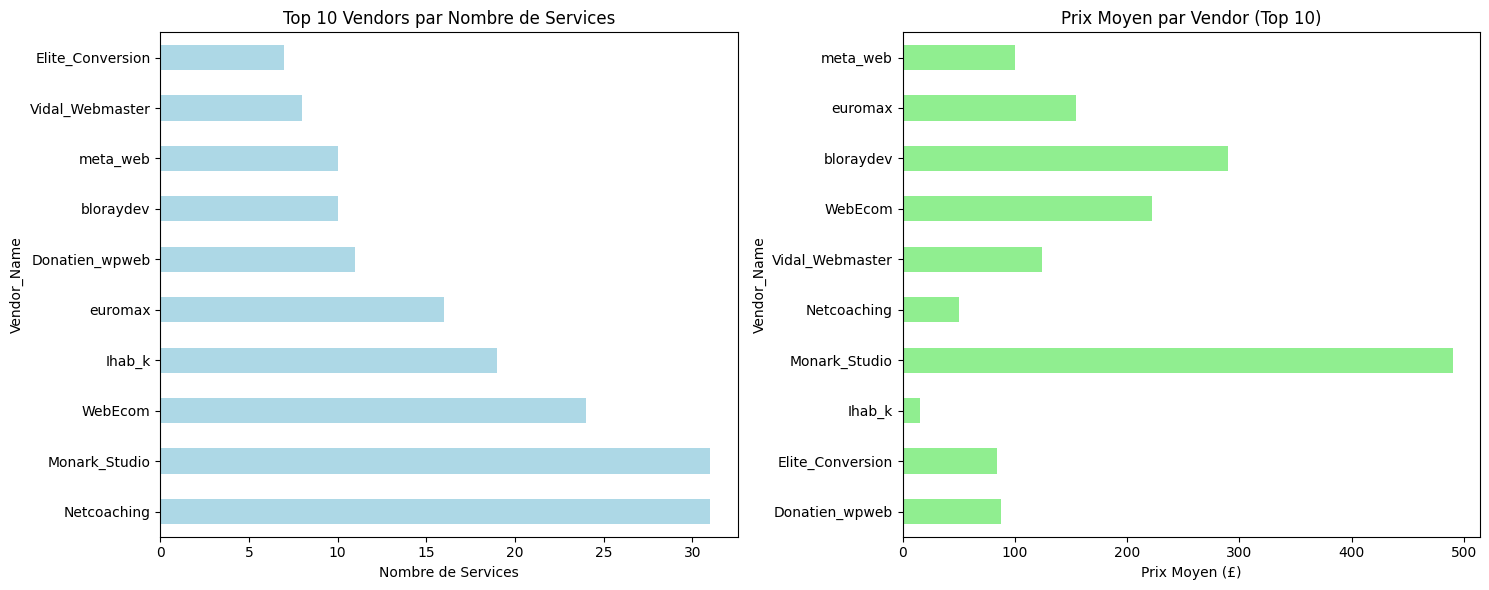

In [12]:
# Top 10 des vendors par nombre de services
vendor_counts = df['Vendor_Name'].value_counts().head(10)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Nombre de services par vendor
vendor_counts.plot(kind='barh', ax=ax1, color='lightblue')
ax1.set_title('Top 10 Vendors par Nombre de Services')
ax1.set_xlabel('Nombre de Services')

# Prix moyen par vendor (top 10)
top_vendors = vendor_counts.index
vendor_avg_price = df[df['Vendor_Name'].isin(top_vendors)].groupby('Vendor_Name')['Price'].mean()
vendor_avg_price.plot(kind='barh', ax=ax2, color='lightgreen')
ax2.set_title('Prix Moyen par Vendor (Top 10)')
ax2.set_xlabel('Prix Moyen (£)')

plt.tight_layout()
plt.show()

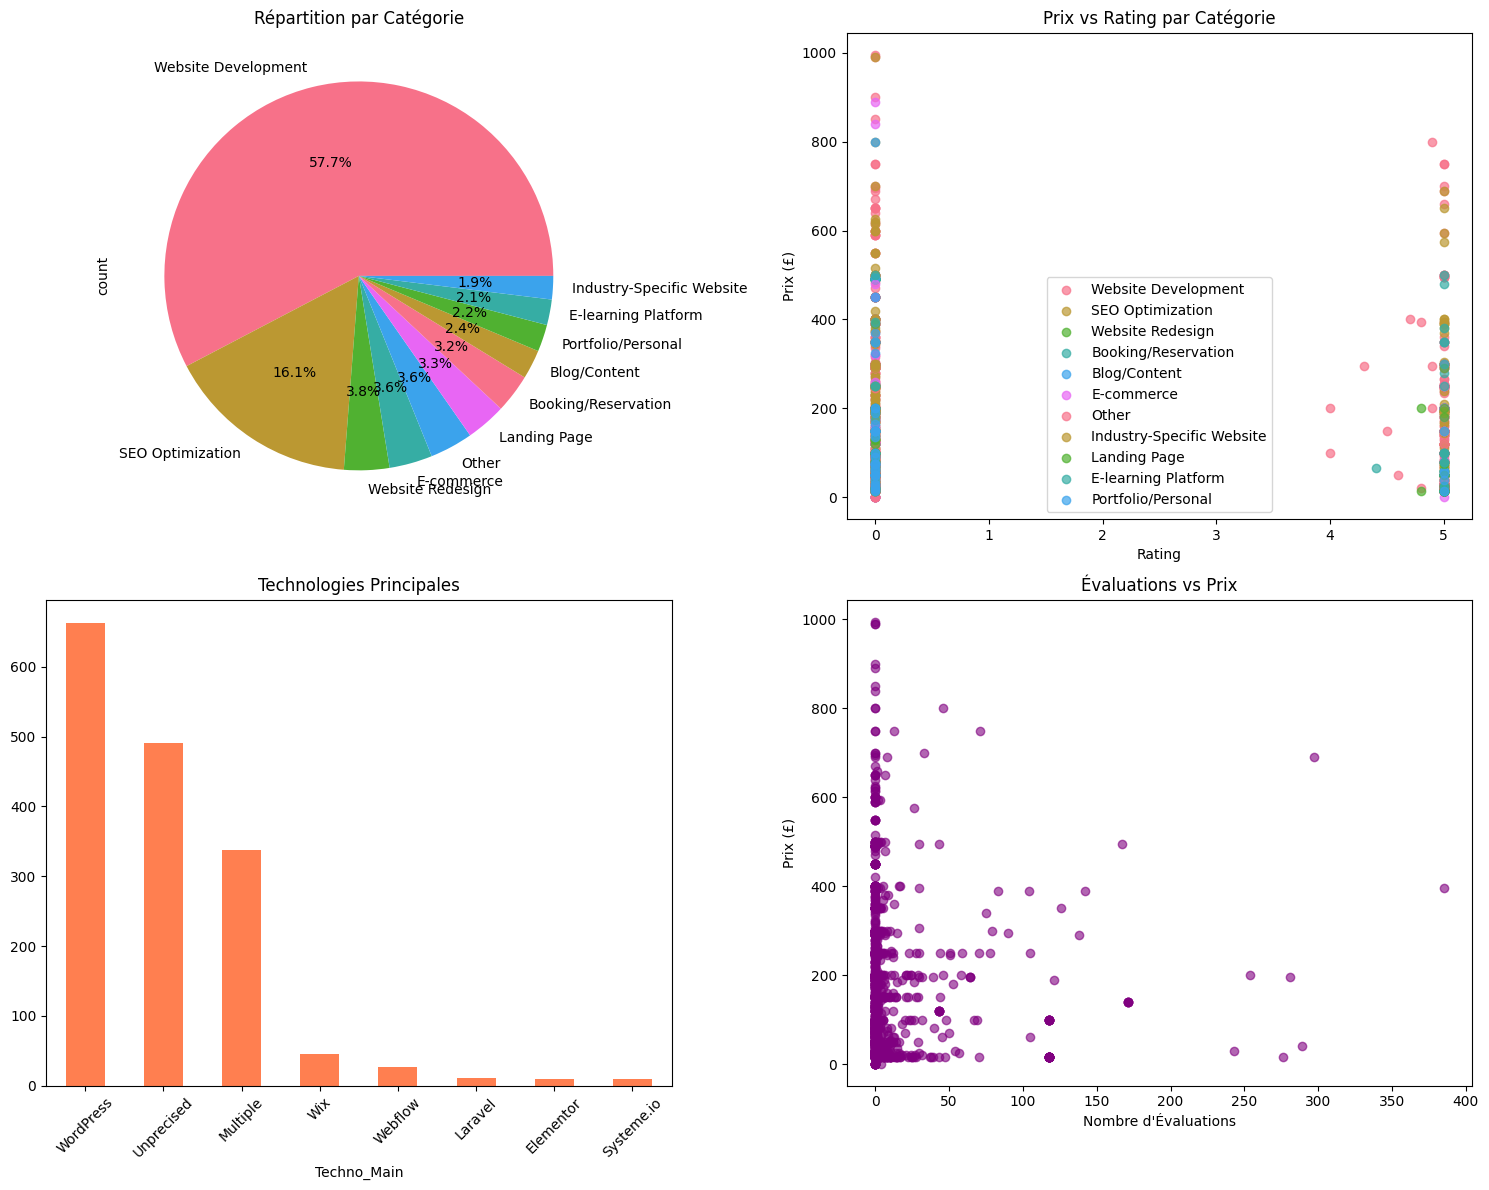

In [13]:
# Dashboard avec plusieurs métriques
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

# 1. Distribution des catégories
df['Category'].value_counts().plot(kind='pie', ax=ax1, autopct='%1.1f%%')
ax1.set_title('Répartition par Catégorie')

# 2. Prix vs Rating coloré par catégorie
for category in df['Category'].unique():
    cat_data = df[df['Category'] == category]
    ax2.scatter(cat_data['Rating'], cat_data['Price'], label=category, alpha=0.7)
ax2.set_xlabel('Rating')
ax2.set_ylabel('Prix (£)')
ax2.set_title('Prix vs Rating par Catégorie')
ax2.legend()

# 3. Technologies principales
main_tech = df['Techno_Main'].value_counts().head(8)
main_tech.plot(kind='bar', ax=ax3, color='coral')
ax3.set_title('Technologies Principales')
ax3.tick_params(axis='x', rotation=45)

# 4. Nombre d'évaluations vs Prix
ax4.scatter(df['Number_of_Ratings'], df['Price'], alpha=0.6, color='purple')
ax4.set_xlabel('Nombre d\'Évaluations')
ax4.set_ylabel('Prix (£)')
ax4.set_title('Évaluations vs Prix')

plt.tight_layout()
plt.show()

In [14]:
# Statistiques résumées
print("\n=== RÉSUMÉ DU DATASET ===")
print(f"Nombre total de services: {len(df)}")
print(f"Prix moyen: {df['Price'].mean():.2f}£")
print(f"Services multi-tech: {df['Is_Multi_Tech'].sum()}/{len(df)} ({df['Is_Multi_Tech'].mean()*100:.1f}%)")
print(f"Technologie la plus populaire: {Counter(all_technologies).most_common(1)[0][0]}")


=== RÉSUMÉ DU DATASET ===
Nombre total de services: 1647
Prix moyen: 167.39£
Services multi-tech: 338/1647 (20.5%)
Technologie la plus populaire: WordPress
